(20,)


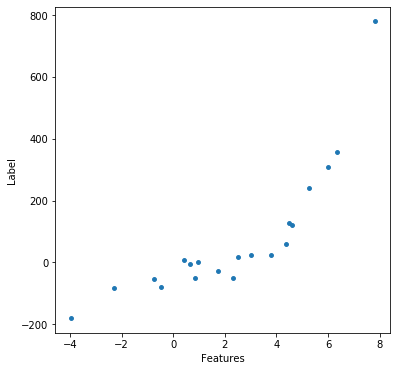

In [95]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

FRAMES = 20
# We take Normal Distribution, therefore mean = 0 and variance = 1
mean = 0
var = 1

def prepare_data(mean, variance, frames):
    return 2.0 - 3.0 * np.random.normal(mean, variance, frames)

def scatter(X, y):
    plt.figure(figsize=(6,6))
    plt.scatter(X, y, s=15)
    plt.xlabel('Features')
    plt.ylabel('Label')
    plt.show()
    
def plot_fit_line(X, y, y_pred):
    plt.scatter(X, y, s=15)
    plt.plot(X, y_pred, c='r')
    plt.xlabel('Features')
    plt.ylabel('Label')
    plt.show()

X = prepare_data(mean, var, FRAMES)
y = 1.0 - (3.0 * (X ** 2)) + (2.0 * (X ** 3)) + np.random.normal(-30, 30, FRAMES)
print(X.shape)

X = X[:, np.newaxis]
y = y[:, np.newaxis]
scatter(X, y)

0.983221853925991


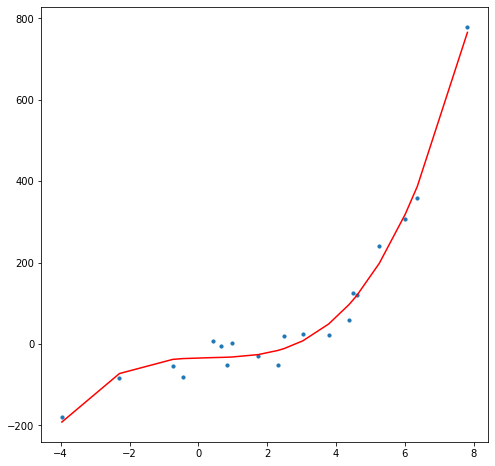

In [98]:
import operator

model = LinearRegression()

poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
# print(X_poly)
model.fit(X_poly, y)
confidence = model.score(X_poly, y)
print(confidence)

y_pred = model.predict(X_poly)

plt.figure(figsize=(8, 8))
plt.scatter(X, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, c='r')
plt.show()

# plot_fit_line(X, y, y_pred)